#### 1. Regresja wielomianowa:



- wygeneruj dane  i narysuj wykres w matplotlib tych danych (ziarno losowe 42)


- zrób regresję liniową i predykcje i dołącz do wykresu


- zbadaj współczynnik r2 score


- dokonaj ektrakcji cech za pomocą sklearn - stopień drugi, dorzuć do wykresu


- zbuduj model stopnia 3 i dołącz do wykresu


- zaimportuj odpowiednie metryki ze sklearn, zbuduj dataframe ze współczynnikami r2 score, mae, mse, rmse dla wszystkich modeli


- przedstaw na wykresie wszystkie metryki - plotly.express, ale możesz spróbować coś innego - matplotlib

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.1)
np.set_printoptions(precision=6, suppress=True)
np.random.seed(42)

### 2. Przygotowanie danych

In [2]:
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)

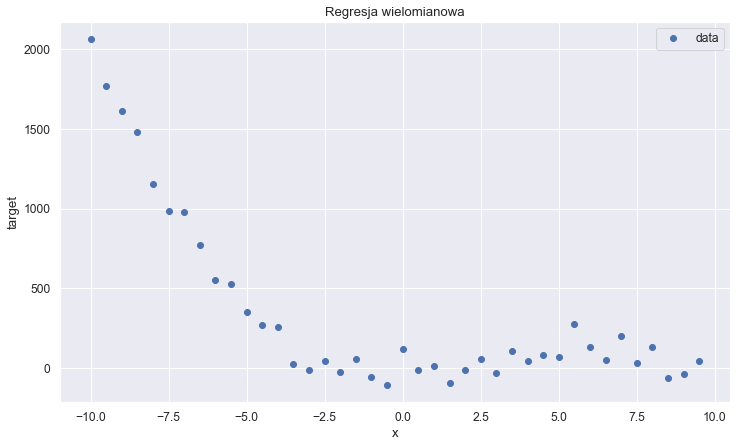

In [3]:
plt.figure(figsize=(12,7))
plt.title('Regresja wielomianowa')
plt.scatter(X, y, label='data' )
plt.xlabel('x')
plt.ylabel('target')
plt.legend()

### 2. Model regresji

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()
reg.fit(X,y)
reg.intercept_

327.16757477008014

In [6]:
intercept = reg.intercept_
coef = reg.coef_

In [7]:
y_pred= reg.predict(X)
reg.score(X,y)

0.5342822962632471

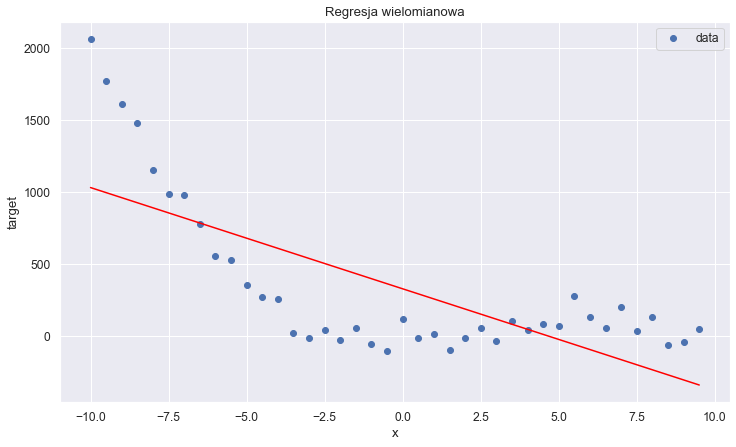

In [8]:
plt.figure(figsize=(12,7))
plt.title('Regresja wielomianowa')
plt.scatter(X, y, label='data' )
plt.plot(X, intercept + X * coef, color='red')
plt.xlabel('x')
plt.ylabel('target')
plt.legend();

In [9]:
from sklearn.metrics import r2_score

In [10]:
y_pred_line = reg.predict(X)

In [11]:
r2_score(y, y_pred_line)

0.5342822962632471

### 3. Model  2 stopnia

In [12]:
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

In [15]:
reg_poly_2 = reg.fit(X_poly, y)

In [16]:
intercept_poly_2 = reg_poly_2.intercept_
coef_poly_2 = reg_poly_2.coef_
y_pred_poly_2 = reg_poly_2.predict(X_poly)

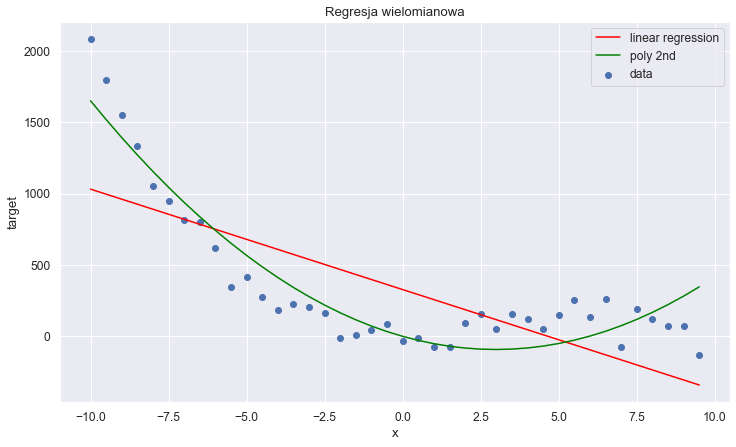

In [17]:
plt.figure(figsize=(12,7))
plt.title('Regresja wielomianowa')
plt.scatter(X, y, label='data' )
plt.plot(X, y_pred_line, color='red', label='linear regression')
plt.plot(X, y_pred_poly_2, color='green', label='poly 2nd' )
plt.xlabel('x')
plt.ylabel('target')
plt.legend();

### 3. Model 3 stopnia

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)

In [20]:
poly_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_3.fit_transform(X)

In [21]:
reg_poly_3 = LinearRegression()
reg_poly_3.fit(X_poly_3, y)

LinearRegression()

In [22]:
reg_poly_3.score(X_poly_3, y)

0.9845920728950993

In [23]:
y_pred_3 = reg_poly_3.predict(X_poly_3)

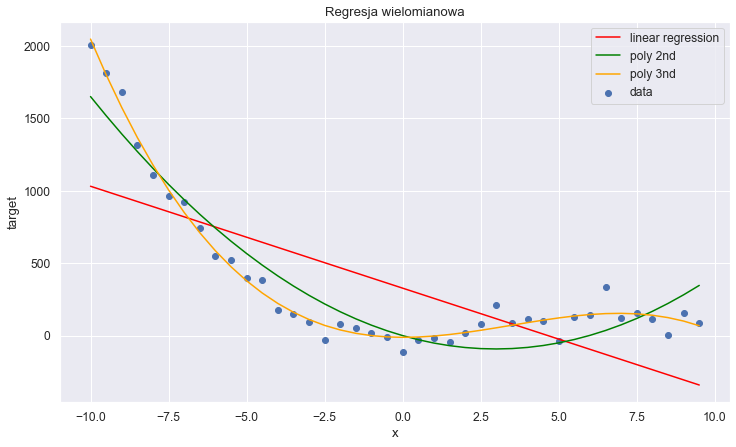

In [24]:
plt.figure(figsize=(12,7))
plt.title('Regresja wielomianowa')
plt.scatter(X, y, label='data' )
plt.plot(X, y_pred_line, color='red', label='linear regression')
plt.plot(X, y_pred_poly_2, color='green', label='poly 2nd' )
plt.plot(X, y_pred_3, color='orange', label='poly 3nd' )
plt.xlabel('x')
plt.ylabel('target')
plt.legend();

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
df =pd.DataFrame(data={
    'name': ['linear regression', 'poly_2nd', 'poly_3rd'],
    'mae': [mean_absolute_error(y, y_pred_line), mean_absolute_error(y, y_pred_poly_2), mean_absolute_error(y, y_pred_3)],
    'mse': [mean_squared_error(y, y_pred_line), mean_squared_error(y, y_pred_poly_2), mean_squared_error(y, y_pred_3)],
    'rmse': [np.sqrt(mean_squared_error(y, y_pred_line)), np.sqrt(mean_squared_error(y, y_pred_poly_2)), np.sqrt(mean_squared_error(y, y_pred_3))],
    'r2_score': [r2_score(y, y_pred_line), r2_score(y, y_pred_poly_2), r2_score(y, y_pred_3)]})


TypeError: 'value' must be an instance of str or bytes, not a numpy.float64

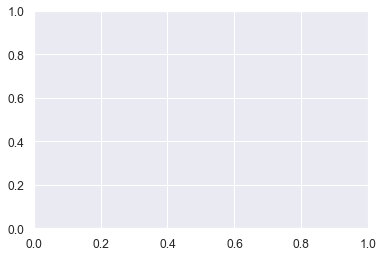

In [34]:
plt.bar(df.loc[0], height=500)

In [35]:
df.loc[0]

name        linear regression
mae                312.772807
mse             140219.829652
rmse               374.459383
r2_score             0.508126
Name: 0, dtype: object